In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime, timedelta

In [4]:
%matplotlib nbagg

In [5]:
uvic_sci_min = np.loadtxt("Data/UVicSci_temperature_minute_data.dat")

In [6]:
len(uvic_sci_min)

2979363

In [7]:
uvic_sci_min[0]

734869.0

In [8]:
uvic_sci_min[1]

736937.99931

In [9]:
uvic_sci_min[2] #length of the data

2979360.0

In MATLAB, datenum(2017,1,1) will return 736696.0 (in decimal days, starting at 01/01/00).

We're trying to replicate that here:

In [10]:
#year, month, day - "year" starts at 2001 (called 1... not 2001); 0 (i.e. year 2000) returns error.
epoch = datetime(1, 1, 1)
result = epoch + timedelta(days=736696.0)
print(result)

2018-01-03 00:00:00


In [11]:
epoch = datetime(datetime.now().year - 2019, 1, 1)
result = epoch + timedelta(days=736696.0)
print(result)

ValueError: year 0 is out of range

In [13]:
epoch = datetime(1, 1, 1)
result = epoch + timedelta(days=736696.0 - 367.0)
print(result)

2017-01-01 00:00:00


Therefore, we use the offset I found above:

In [22]:
tt_start = uvic_sci_min[0]
tt_end = uvic_sci_min[1]
NT = uvic_sci_min[2]

In [15]:
epoch = datetime(1, 1, 1)
tt_start_pretty = epoch + timedelta(days=tt_start-367.0) 
tt_end_pretty = epoch + timedelta(days=tt_end-367.0) 

In [20]:
print("Start time :", tt_start_pretty)
print("End time :", tt_end_pretty)

Start time : 2012-01-01 00:00:00
End time : 2017-08-30 23:59:00.383999


In [24]:
tt = np.linspace(tt_start, tt_end, int(NT))

<IPython.core.display.Javascript object>


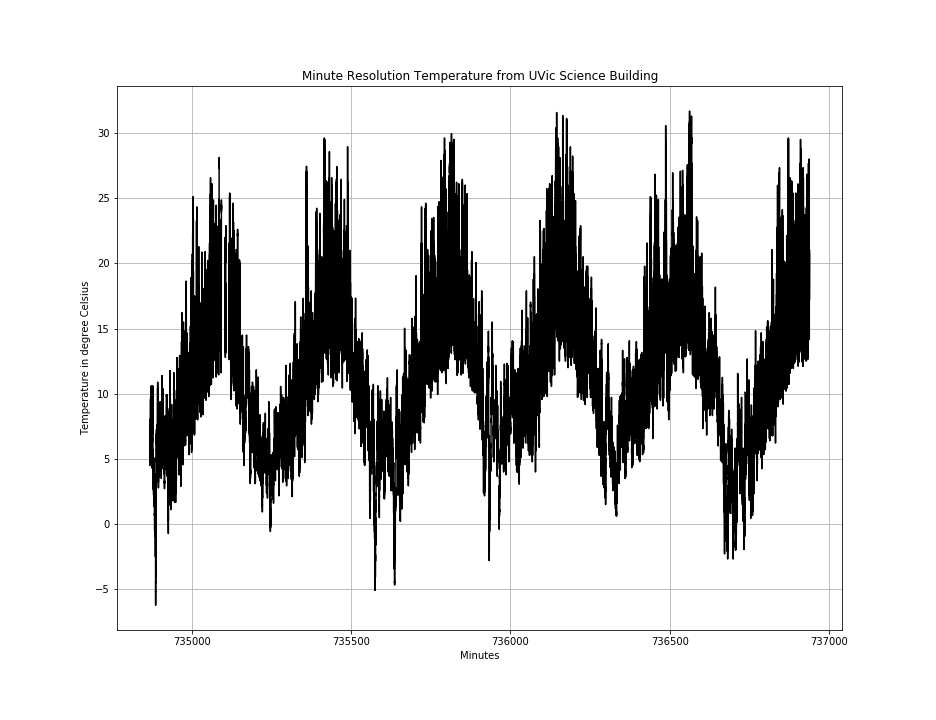

Text(0, 0.5, 'Temperature in degree Celsius')

In [30]:
plt.figure(figsize=(13, 10))
plt.plot(tt, uvic_sci_min[3:], 'k')
plt.grid()
plt.title("Minute Resolution Temperature from UVic Science Building")
plt.xlabel("Minutes")
plt.ylabel("Temperature in degree Celsius")

In [31]:
plt.close()

In [25]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2017.dat")

In [26]:
all_hour[0]

array([    nan, 236.554, 236.499, 236.679, 236.607, 236.514, 236.63 ,
       236.523, 236.543, 236.662, 236.304, 236.604, 236.43 , 236.7  ,
       236.471, 236.446, 236.25 , 236.283, 236.597, 236.635, 236.494,
       236.672, 236.639, 236.595, 236.67 , 236.686, 236.579, 236.639,
       236.641, 236.619, 236.514, 236.357, 236.574, 236.596, 236.676,
       236.691, 236.689, 236.451])

In [27]:
len(all_hour)

84723

In [28]:
len(all_hour[0])

38

In [29]:
all_hour[3]

array([7.33408042e+05, 3.06000000e+00, 1.38000000e+00, 4.28000000e+00,
       4.77000000e+00, 3.46000000e+00, 4.21000000e+00, 2.64000000e+00,
       4.15000000e+00, 4.61000000e+00, 4.95000000e+00, 4.59000000e+00,
       1.92000000e+00, 4.74000000e+00, 2.96000000e+00, 3.19000000e+00,
       4.43000000e+00, 4.06000000e+00, 3.40000000e+00, 4.36000000e+00,
       3.26000000e+00, 4.61000000e+00, 4.61000000e+00, 4.55000000e+00,
       4.34000000e+00, 4.64000000e+00, 5.21000000e+00, 4.74000000e+00,
       4.41000000e+00, 4.30000000e+00, 2.87000000e+00,            nan,
       4.15000000e+00, 4.60000000e+00, 4.44000000e+00,            nan,
       4.85000000e+00, 4.05000000e+00])

In [30]:
all_hour = all_hour.reshape(len(all_hour[0]), len(all_hour))

In [31]:
len(all_hour)

38

In [32]:
all_hour[0]

array([    nan, 236.554, 236.499, ...,   7.35 ,   7.85 ,   7.12 ])

In [38]:
all_hour[3]

array([12.65, 12.45, 12.98, ...,  5.73,  6.48,  5.43])

In [18]:
uvic_sci_hour = all_hour[-3]

In [24]:
all_hour[0]

array([    nan, 236.554, 236.499, ...,   7.35 ,   7.85 ,   7.12 ])

In [20]:
len(uvic_sci_hour)

84723

In [21]:
uvic_sci_hour

array([5.3 , 2.42, 4.33, ..., 0.89, 2.83, 3.34])